In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import bernoulli,norm,uniform,rankdata
import tqdm

In [2]:
# CI function
def CI(data,alpha):
    sample_mean=np.mean(data) # data is a list!
    sample_sigma=np.std(data)
    critical_point = norm.ppf(1-alpha/2)
    LB=sample_mean-critical_point*sample_sigma/np.sqrt(len(data))
    UB=sample_mean+critical_point*sample_sigma/np.sqrt(len(data))
    return round(LB,3),round(UB,3)

In [3]:
def tournament(simulation_times,contestants,sigma0_RMS,range_RMS):
    N=simulation_times
    MC=np.zeros(N)
    NC=contestants # Number of contestants
    for k in range(N):
    #for k in range(N):
        Q=np.zeros((10,10))
        Ber=np.zeros((10,10))
        sigma_RMS=np.zeros(NC)
        score=np.zeros(NC)
        determine_matrix=np.zeros((10,10))

        for i in range(Q.shape[1]): # Create bernouli result matrix
            p=np.arange(0.05,1,0.1)[i]
            Q[:,i]=p
            for j in range(Q.shape[0]):
                Ber[j,i]=bernoulli.rvs(p, size=1) 
            ## We can't merge this loop into next one because everyone has the same Ber. result!

        for i in range(NC): # for each contestant
            sigma_RMS[i]=sigma0_RMS+range_RMS*i/NC
            prediction=np.zeros((Q.shape[0],Q.shape[1]))
            for a in range(Q.shape[0]): # Create indicator to determine plus or minus sigma
                for b in range(Q.shape[1]):
                    Z=np.random.normal(0,1)
                    if Z>0:
                        prediction[a,b] = Q[a,b]+sigma_RMS[i]
                    else:
                        prediction[a,b] = Q[a,b]-sigma_RMS[i]
            score[i] = np.sum((Ber-prediction)**2)
        MC[k]=np.where(score==np.min(score))[0][0]
    print('\n Average rank of the winner by Monte Carlo is: {}'.format(np.mean(MC)))
    print('\n The confidence interval is: {}'.format(CI(MC,0.05)))
    return MC,score

In [4]:
def plotfig(score):
    print('\n The winner is Rank {} with the lowest score = {}'.format(np.where(score==np.min(score))[0][0],round(np.min(score),2)))
    plt.figure(figsize=(10,5))
    plt.plot(score,linewidth=2)
    plt.title('Score for each contestant',fontsize=13)
    plt.xlabel('Rank of each contestant',fontsize = 10)
    plt.ylabel('Score',fontsize = 10)
    plt.xticks(fontsize=10);
    plt.yticks(fontsize=10)
    plt.grid( which = 'major' )
    plt.grid( which = 'minor', linestyle = ':' )
    plt.savefig('plot.pdf')
    
    plt.figure(figsize=(10,5))
    plt.hist(score,bins=30)
    plt.title('Score distribution',fontsize=13)
    plt.xlabel('Score',fontsize = 12)
    plt.ylabel('Frequency',fontsize = 12)
    plt.xticks(fontsize=12);
    plt.yticks(fontsize=12)
    plt.savefig('hist.pdf')
    plt.show()

In [5]:
'''
Scenario1: contestants = [300,100,500]
Scenario2: sigma0_RMS = [0,0.05,0.1] 
Scenario3: range_RMS = [0.3,0.1,0.5] 
Scenario4: probability
'''
contestants=[300,100,500]
sigma0_RMS=[0,0.05,0.1]
range_RMS=[0.3,0.1,0.5]

simulation_times=10

*************************************************************
Scenario 1-1: 300 contestants, Sigma0 = 0 with length 0.3
*************************************************************

 Average rank of the winner by Monte Carlo is: 113.0

 The confidence interval is: (75.521, 150.479)

 The winner is Rank 104 with the lowest score = 15.56


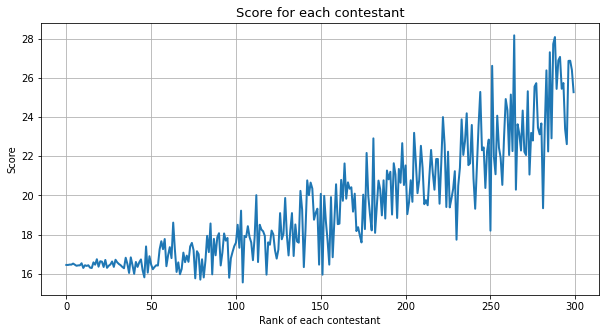

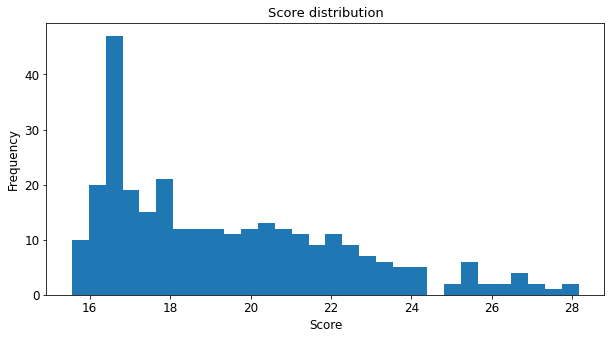

*************************************************************
Scenario 1-2: 100 contestants, Sigma0 = 0 with length 0.3
*************************************************************

 Average rank of the winner by Monte Carlo is: 32.6

 The confidence interval is: (22.737, 42.463)

 The winner is Rank 16 with the lowest score = 18.38


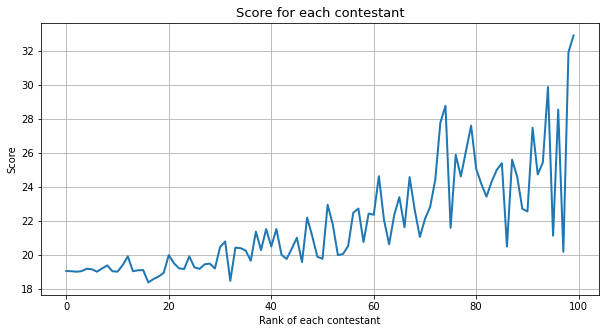

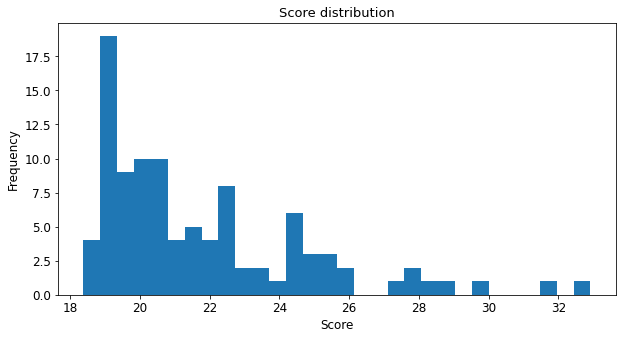

*************************************************************
Scenario 1-3: 500 contestants, Sigma0 = 0 with length 0.3
*************************************************************

 Average rank of the winner by Monte Carlo is: 170.4

 The confidence interval is: (135.365, 205.435)

 The winner is Rank 133 with the lowest score = 14.24


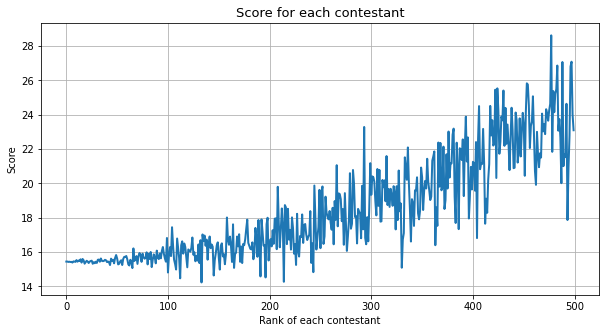

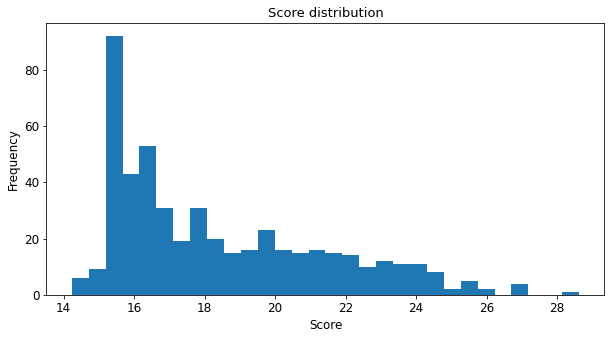

In [6]:
'''
Adjust Scenario 1, Control others
'''
count=1
j,k=0,0
for i in range(3):
    print('*************************************************************')
    print('Scenario 1-{}: {} contestants, Sigma0 = {} with length {}'.format(count,contestants[i],sigma0_RMS[j],range_RMS[k]))
    print('*************************************************************')
    MC,score=tournament(simulation_times,contestants[i],sigma0_RMS[j],range_RMS[k])
    plotfig(score)
    count+=1

*************************************************************
Scenario 2-1: 300 contestants, Sigma0 = 0 with length 0.3
*************************************************************

 Average rank of the winner by Monte Carlo is: 119.8

 The confidence interval is: (101.61, 137.99)

 The winner is Rank 80 with the lowest score = 18.05


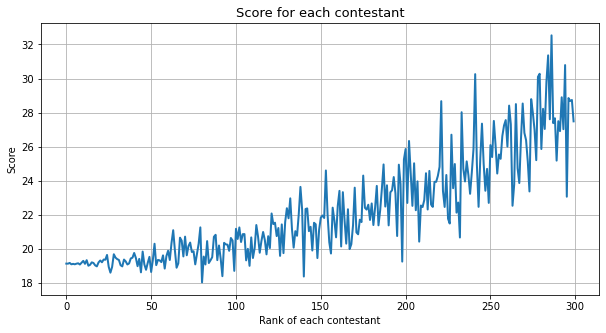

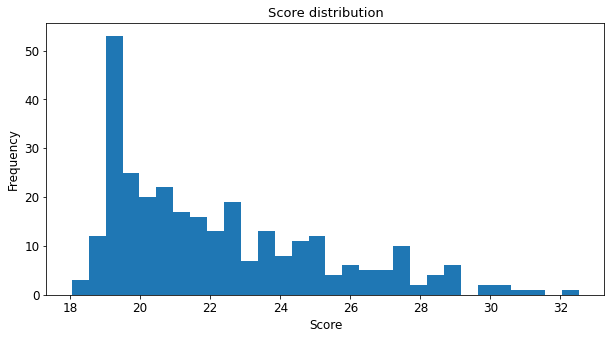

*************************************************************
Scenario 2-2: 300 contestants, Sigma0 = 0.05 with length 0.3
*************************************************************

 Average rank of the winner by Monte Carlo is: 70.9

 The confidence interval is: (48.744, 93.056)

 The winner is Rank 105 with the lowest score = 15.47


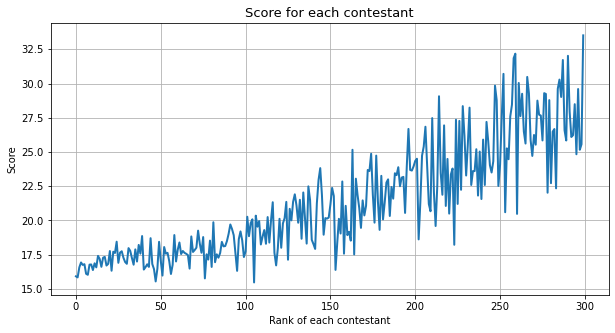

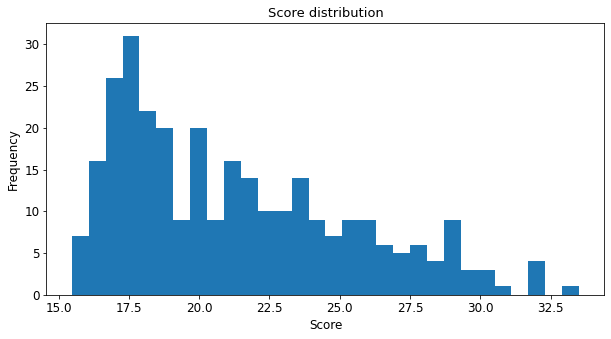

*************************************************************
Scenario 2-3: 300 contestants, Sigma0 = 0.1 with length 0.3
*************************************************************

 Average rank of the winner by Monte Carlo is: 37.0

 The confidence interval is: (19.661, 54.339)

 The winner is Rank 53 with the lowest score = 15.01


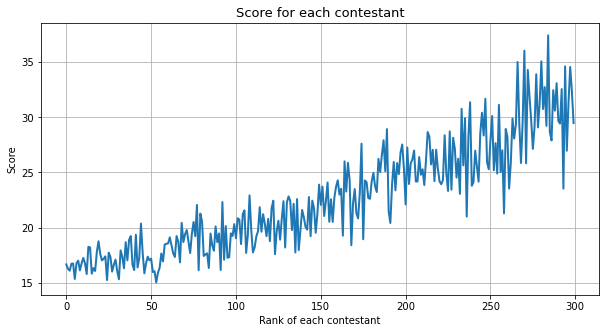

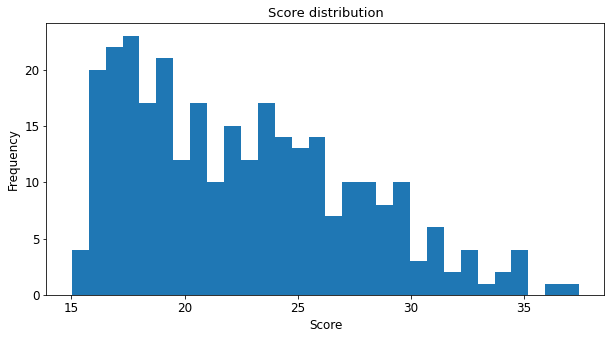

In [7]:
'''
Adjust Scenario 2, Control others
'''
count=1
i,k=0,0
for j in range(3):
    print('*************************************************************')
    print('Scenario 2-{}: {} contestants, Sigma0 = {} with length {}'.format(count,contestants[i],sigma0_RMS[j],range_RMS[k]))
    print('*************************************************************')
    MC,score=tournament(simulation_times,contestants[i],sigma0_RMS[j],range_RMS[k])
    plotfig(score)
    count+=1

*************************************************************
Scenario 3-1: 300 contestants, Sigma0 = 0 with length 0.3
*************************************************************

 Average rank of the winner by Monte Carlo is: 99.1

 The confidence interval is: (73.052, 125.148)

 The winner is Rank 110 with the lowest score = 12.79


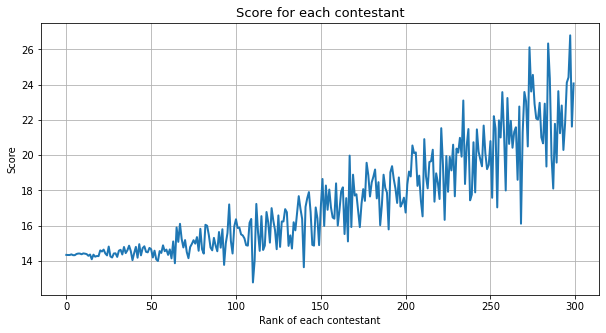

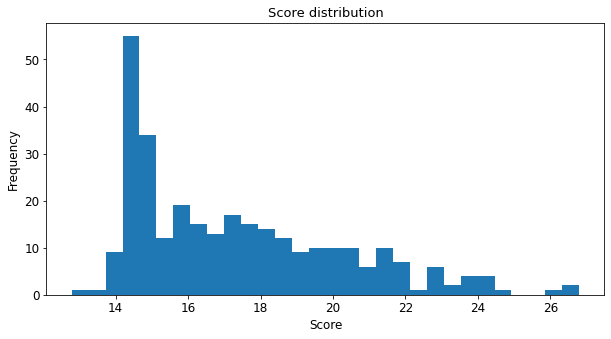

*************************************************************
Scenario 3-2: 300 contestants, Sigma0 = 0 with length 0.1
*************************************************************

 Average rank of the winner by Monte Carlo is: 223.5

 The confidence interval is: (199.907, 247.093)

 The winner is Rank 280 with the lowest score = 16.14


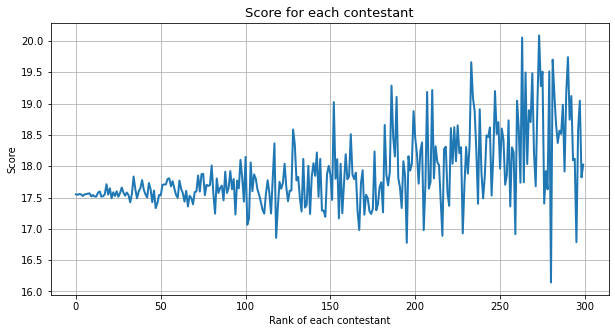

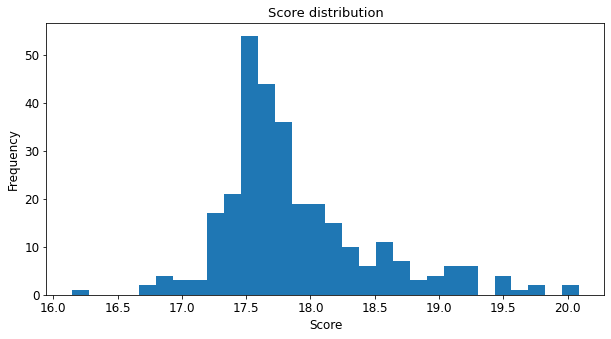

*************************************************************
Scenario 3-3: 300 contestants, Sigma0 = 0 with length 0.5
*************************************************************

 Average rank of the winner by Monte Carlo is: 58.6

 The confidence interval is: (46.565, 70.635)

 The winner is Rank 44 with the lowest score = 15.87


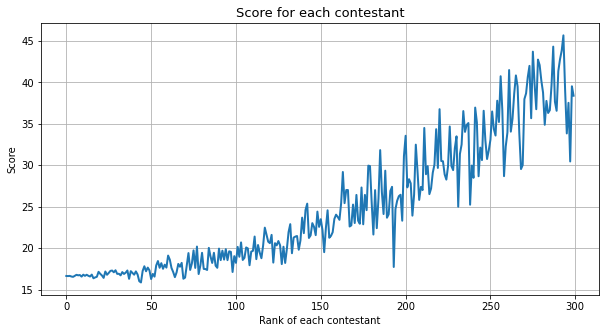

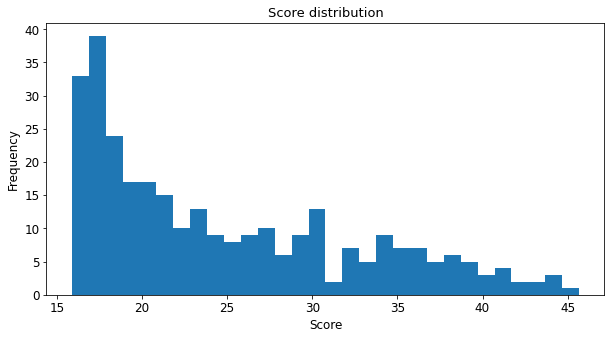

In [8]:
'''
Adjust Scenario 3, Control others
'''
count=1
i,j=0,0
for k in range(3):
    print('*************************************************************')
    print('Scenario 3-{}: {} contestants, Sigma0 = {} with length {}'.format(count,contestants[i],sigma0_RMS[j],range_RMS[k]))
    print('*************************************************************')
    MC,score=tournament(simulation_times,contestants[i],sigma0_RMS[j],range_RMS[k])
    plotfig(score)
    count+=1

In [ ]:
'''
Create all scenarios
'''
count=1
for i in range(3):
    for j in range(3):
        for k in range(3):
            print('*************************************************************')
            print('Scenario {}: {} contestants, Sigma0 = {} with length {}'.format(count,contestants[i],sigma0_RMS[j],range_RMS[k]))
            print('*************************************************************')
            MC,score=tournament(simulation_times,contestants[i],sigma0_RMS[j],range_RMS[k])
            plotfig(score)
            count+=1